In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
import yahoofinancials
from datetime import datetime

In [19]:
def get_hist_price(ticker,start_dt='2003-01-01',end_dt=None):
    if not end_dt:
        end_dt = datetime.today().strftime('%Y-%m-%d')
    df = yf.download(ticker, start=start_dt, end=end_dt, progress=False)
    return df

In [18]:
cn_tickers = {'SSE':'000001.SS','SZSE':'399106.SZ','HSI':'^HSI'}
us_tickers = {'SP500':'^GSPC','DJI':'^DJI','Nasdaq':'^IXIC','Russel':'^RUT'}

In [37]:
def get_hist_data(tickers):
    df = pd.DataFrame()
    for t,s in tickers.items():
        df_t = get_hist_price(s)
        df[t] = df_t['Close']
    return df

In [39]:
cn_df = get_hist_data(cn_tickers)

In [40]:
us_df = get_hist_data(us_tickers)

In [42]:
cn_df.head()

,SSE,SZSE,HSI
Date,,,
2003-01-01,1357.650024,388.755005,NaN
2003-01-02,1320.630005,380.436005,9365.519531
2003-01-03,1319.868042,381.411987,9583.849609
2003-01-06,1334.678955,387.160004,9665.959961
2003-01-07,1332.061035,386.140991,9652.400391


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

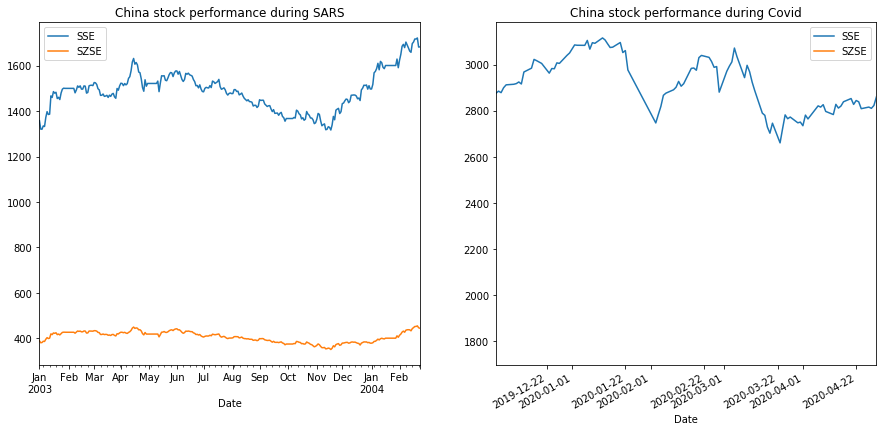

In [58]:
ROW_NUM=1
COL_NUM=2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,7))
cn_df[:300][['SSE','SZSE']].plot(ax=axes[0],title='China stock performance during SARS')
cn_df[-100:][['SSE','SZSE']].plot(ax=axes[1],title='China stock performance during Covid')


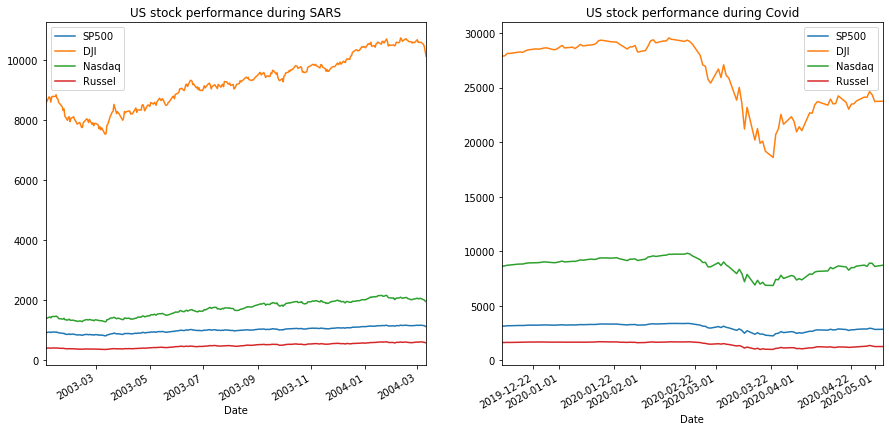

In [59]:
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,7))
us_df[:300].plot(ax=axes[0],title='US stock performance during SARS')
us_df[-100:].plot(ax=axes[1],title='US stock performance during Covid')